- Numerically solving ODEs with initial values

In [1]:
import matplotlib.pyplot as pl
import numpy as np
import math 

# Task A: Explicit Methods
![](2022-11-04-21-13-25.png)

In [2]:
##ysol = lambda t: 1- t**2 + math.exp(-(t**2)) 
##Implement a Forward Euler Scheme

def FwEuler(t0,y0,h,tf):
    f1 = lambda y,t: (-2*y*t -2*(t**3)) 

    ylist = []
    tlist = []
    condition = True
    while condition:
        ylist = ylist + [round(y0,3)]
        tlist = tlist +[round(t0,3)]
        
        x = f1(y0,t0)
        y1 = y0 + h*x
        
        y0 = y1
        t0 += h
        
        condition = t0 < tf
        
    print("y:")
    print(ylist)
    print("t")
    print(tlist)
        
    
    

In [3]:
FwEuler(0,10,0.1,1)


y:
[10, 10.0, 9.8, 9.406, 8.836, 8.117, 7.28, 6.363, 5.404, 4.437, 3.492]
t
[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


In [5]:
## RK4 Method

def RK4(t0,y0,h,tf):
    f1 = lambda y,t: (-2*y*t -2*(t**3)) 
    
    ylist = []
    tlist = []
    
    condition = True
    while condition:
        ylist = ylist + [round(y0,3)]
        tlist = tlist +[round(t0,3)]
        
        k1 = h*f1(y0,t0)
        k2 = h*f1((y0+k1),(t0+h))
        k3 = h*f1((y0+k2/2),(t0+h/2))
        k4 = h*f1((y0+k3),(t0+h))
        
        y1 = y0 + (k1 + 2*(k2) + 2*(k3) + k4)
        
        y0 = y1
        t0 += h
        
        condition = t0 < tf
        
    print("y:")
    print(ylist)
    print("t")
    print(tlist)


In [6]:
RK4(0,10,0.1,1)

y:
[10, 9.203, 7.393, 5.082, 2.89, 1.249, 0.253, -0.264, -0.541, -0.745, -0.951]
t
[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


## Task 2: Implicit Method - Backward Euler for THE SPECIFIC ODE
![](2022-11-04-21-14-13.png)

In [7]:
def BwEuler(t0,y0,h,tf):
    f1 = lambda y,t: (-2*y*t -2*(t**3)) 
    fs = lambda y,t: ((y-2*(t**3))/(1+2*t))

    ylist = []
    tlist = []
    condition = True
    while condition:
        ylist = ylist + [round(y0,3)]
        tlist = tlist +[round(t0,3)]
        
        t0 += h
        y1 = fs(y0,t0)
        
        y0 = y1
        
        condition = t0 < tf
        
    print("y:")
    print(ylist)
    print("t")
    print(tlist)

In [8]:
BwEuler(0,10,0.1,1)

y:
[10, 8.332, 5.94, 3.679, 1.973, 0.861, 0.195, -0.205, -0.473, -0.689, -0.896]
t
[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


# Task C: System of ODEs, with explicit methods
![](image..png)

In [13]:
##Solved for the Predator prey problem
f1 = lambda ya,yb,t: (0.3*ya*yb-0.8*ya)
f2 = lambda ya,yb,t: (1.1*yb-yb*ya) 

def FwEulerTwo(Vector,t0,tf,h):

    ya0 = Vector[0][0]
    yb0 = Vector[1][0]
                          
    yalist = []
    yblist = []
    tlist = []
                          
    
                
    condition = True
    while condition:
        yalist = yalist + [round(ya0,3)]
        yblist = yblist + [round(yb0,3)]
        tlist = tlist +[round(t0,3)]
        
        
        ya1 = ya0 + h * f1(ya0,yb0,t0)
        yb1 = yb0 + h * f2(ya0,yb0,t0)
                        
        ya0 = ya1
        yb0 = yb1
        t0 += h
        
        condition = t0 < tf

    results = np.array((yalist,yblist))

    #print("ya and yb")
    #print(results)
    #print("t")
    #print(tlist)
    return results, tlist
    
    
    
    

In [14]:
Vector =[[0.8],[7]]
## price of rental houses in thousands of pounds - inhabitants in millions
t0 = 0
tf = 40
h = 0.019

r = FwEulerTwo(Vector,t0,tf,h)

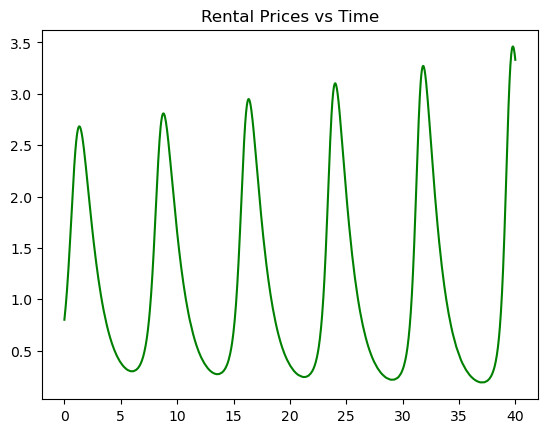

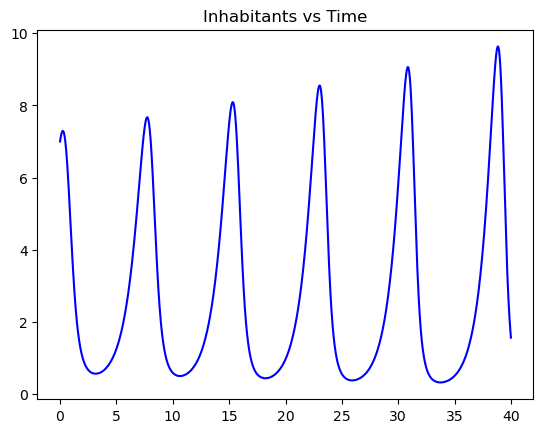

Text(0.5, 1.0, 'Inhabitants(blue) and Prices(green) vs time')

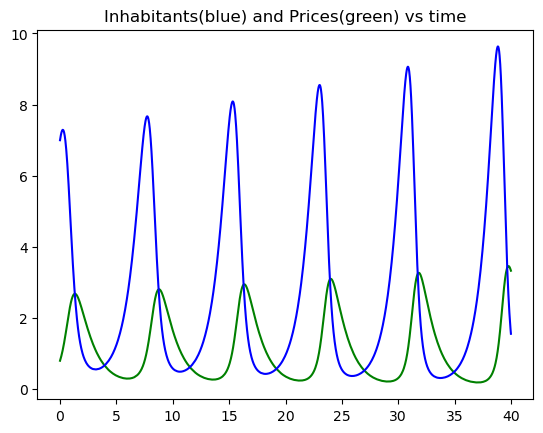

In [15]:
pl.plot(r[1],r[0][0], color="green")
pl.title("Rental Prices vs Time")

pl.show()
pl.plot(r[1],r[0][1], color="blue")
pl.title("Inhabitants vs Time")


pl.show()
pl.plot(r[1],r[0][0], color="green")
pl.plot(r[1],r[0][1], color="blue")
pl.title("Inhabitants(blue) and Prices(green) vs time")

# Task D: Higher order ODEs: damped non-linear motion of a pendulum
![](2022-11-04-21-20-39.png)


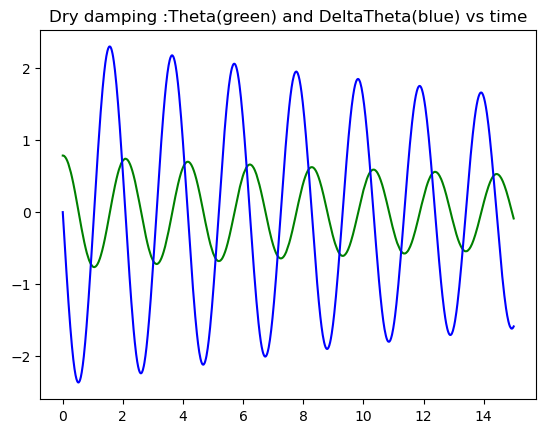

Text(0.5, 1.0, 'Wet damping: Theta(green) and DeltaTheta(blue) vs time')

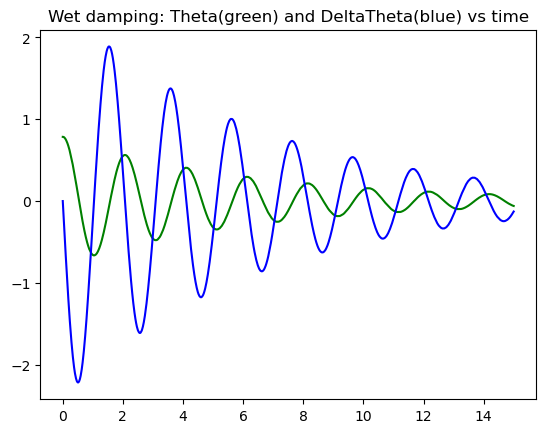

In [16]:
t0 = 0
tf = 15
Vector = [[math.pi /4], [0]]
h = 0.005
m = 0.5
L = 1
g = 9.81
cdry = 0.05
cwet = 0.18
c = cdry


#dw1/dt formula
f1 = lambda wb: (wb)

#dw2/dt formula
f2 = lambda wa,wb: (-c/m * wb -g/L*math.sin(wa)) 



def ModifiedFwEulerTwo(Vector,t0,tf,h):

    ya0 = Vector[0][0]
    yb0 = Vector[1][0]
                          
    yalist = []
    yblist = []
    tlist = []
                          
    
                
    condition = True
    while condition:
        yalist = yalist + [round(ya0,3)]
        yblist = yblist + [round(yb0,3)]
        tlist = tlist +[round(t0,3)]
        
        
        ya1 = ya0 + h * f1(yb0)
        yb1 = yb0 + h * f2(ya0,yb0)
                        
        ya0 = ya1
        yb0 = yb1
        t0 += h
        
        condition = t0 < tf
        
    #print("ya and yb")
    results = np.array((yalist,yblist))
    #print(results)
    #print("t")
    #print(tlist)
    return results, tlist
    



r = ModifiedFwEulerTwo(Vector,t0,tf,h)

pl.show()
pl.plot(r[1],r[0][0], color="green")
pl.plot(r[1],r[0][1], color="blue")
pl.title("Dry damping :Theta(green) and DeltaTheta(blue) vs time")



c = cwet
r = ModifiedFwEulerTwo(Vector,t0,tf,h)

pl.show()
pl.plot(r[1],r[0][0], color="green")
pl.plot(r[1],r[0][1], color="blue")
pl.title("Wet damping: Theta(green) and DeltaTheta(blue) vs time")

